# Motionsense
Download data from Kaggle: [MotionSense Dataset: Sensor Based Human Activity and Attribute Recognition][motion_website].

Download the datasets and run this script.

[motion_website]: https://www.kaggle.com/malekzadeh/motionsense-dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
data_subjects = pd.read_csv("./data/data_subjects_info.csv")
data_subjects.head()

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0


Let's import and look a single datastream first.

In [21]:
data_stream_1subject = pd.read_csv("./data/A_DeviceMotion_data/A_DeviceMotion_data/wlk_7/sub_1.csv", index_col = 0)
data_stream_1subject.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-1.711140,-1.429168,-2.591433,-0.139767,0.989987,0.019745,-0.350593,-0.511691,-0.865217,0.091702,0.415881,0.093689
1,-1.787917,-1.414171,-2.630956,-0.152324,0.987759,0.033602,-0.550553,-2.243217,-0.582409,0.367412,0.004566,-0.106082
2,-1.897323,-1.399331,-2.706668,-0.161610,0.985336,0.054729,-0.931014,-1.358033,-0.503947,0.172093,-0.217483,-0.163387
3,-2.018375,-1.383279,-2.813421,-0.168058,0.982470,0.080680,-1.304668,-0.541368,-0.346302,0.004957,-0.237566,-0.019080
4,-2.124395,-1.364054,-2.913092,-0.174613,0.978705,0.107922,-1.278349,-0.434722,-0.398598,-0.040292,-0.241461,0.015201


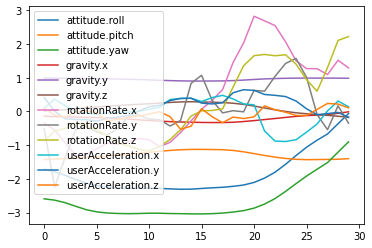

In [29]:
data_stream_1subject.iloc[0:30].plot()
plt.show()

Let's isolate the acceleration data and look at that first. It is possible that's all we need.

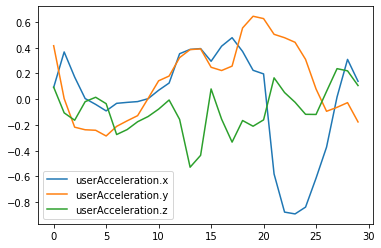

In [31]:
acc_cols = ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]
data_stream_1subject[acc_cols].iloc[0:30].plot()
plt.show()

This data would depend on the accelerometers orientation and could possible confuse the learning process (Although, we don't really know this, it could instead be a source for additional features with additional information). Therefore, we should also look at the absolute value of the acceleration.

In [37]:
data_stream_1subject["absAcceleration"] = np.sqrt((data_stream_1subject[acc_cols]**2).sum(axis = 1))

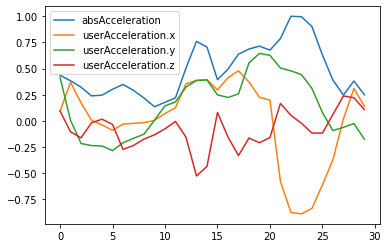

In [40]:
data_stream_1subject[["absAcceleration"] + acc_cols].iloc[0:30].plot()
plt.show()